In [320]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [321]:
import cv2
#Converting the rgb data to gray scale
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

X_train.shape

(50000, 32, 32)

In [322]:
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [323]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])


In [324]:
!pip install validclust

In [325]:
from sklearn.metrics import pairwise_distances
from validclust import dunn
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist 

def find_kmeans(iterations, random_data = []):
  print('-----------------------------------------')    

  #To differentaite between single call with optimal random points and iterative call
  if (len(random_data) != 0):
    random_points = random_data
  else:
    random_points = np.random.choice(len(X_test), 10, replace= False)
  

  X_centroids = X_test[random_points, :]

  distances = np.empty((X_test.shape[0], X_centroids.shape[0]), dtype=np.double)

  #shape is (10000 , 10) - This is for all the data points we obtain 10 distances
  distances = cdist(X_test, X_centroids ,'euclidean')
  
  # this returns the index of minimum value of row passed for all the 10 distances
  # of each data point
  points = np.array([np.argmin(i) for i in distances])

  print(random_points)

  for _ in range(iterations): 
      centroids = []

      for i in range(10):
          #Updating Centroids by taking mean of Cluster it belongs to
          cluster_array = []
          for data in range(len(X_test)):
            if points[data] == i:
              cluster_array.append(X_test[data])

          temp_centroids = np.mean(cluster_array,axis=0) 
          
          centroids.append(temp_centroids)

      centroids = np.asarray(centroids)

      distances = cdist(X_test, centroids ,'euclidean')
      
      points = np.array([np.argmin(i) for i in distances])

  sil_score = silhouette_score(X_test, points)
  print('Silhoutte score: ',sil_score)
  dist = pairwise_distances(X_test)
  dun_score = dunn(dist,points)
  print('Dunn score: ',dun_score)

  return points

In [326]:
for i in range (0,10):
  find_kmeans(50)

-----------------------------------------
[8759 2358 4485 7382 3193 9153 1114 3397 9962 2810]
Silhoutte score:  0.06008935685112725
Dunn score:  0.08923394585119941
-----------------------------------------
[8824 4065 7697  419 8635 2461 4272 6824 3437 2188]
Silhoutte score:  0.05448366181275128
Dunn score:  0.09108497591578157
-----------------------------------------
[8163 7980 2380 6483 7734 3280 2654  490 8048 6645]
Silhoutte score:  0.06001236161796621
Dunn score:  0.09121709729952622
-----------------------------------------
[9678  408  234 8578 4089 9054 2002 6978 8848 3048]
Silhoutte score:  0.06085198976532431
Dunn score:  0.08743776895704287
-----------------------------------------
[7052 7208 7144 9329 8260 6442 7673 6247 5455 2768]
Silhoutte score:  0.05293883594475807
Dunn score:  0.08771274767998016
-----------------------------------------
[2281 6387 3121  294 2253 8419 4884  773 3240 4788]
Silhoutte score:  0.06467545270849334
Dunn score:  0.08883302206648776
----------

In [328]:
Target_Labels = find_kmeans(50,[865,8519,5137,2305,3653,4248,6965,4310,2482,305])

-----------------------------------------
[865, 8519, 5137, 2305, 3653, 4248, 6965, 4310, 2482, 305]
Silhoutte score:  0.05764828003943545
Dunn score:  0.09283983112375284


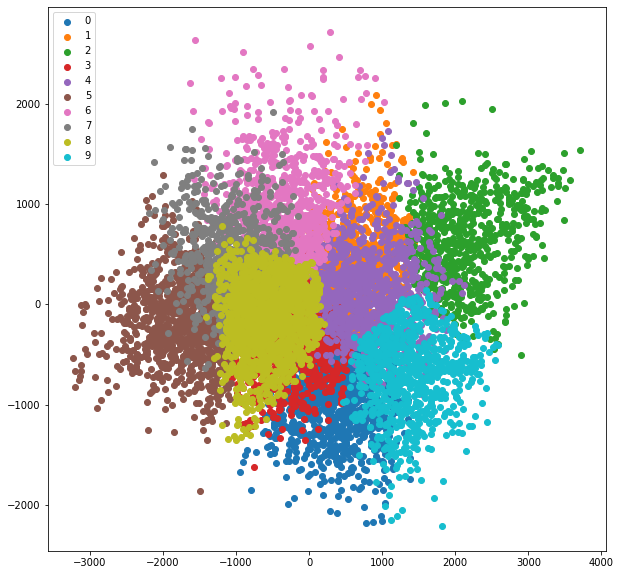

In [329]:
from sklearn.decomposition import PCA

pca = PCA(2)
X_test_transformed = pca.fit_transform(X_test)

Unique_Points = np.unique(Target_Labels)

plt.figure(figsize=(10,10))
for i in Unique_Points:
    plt.scatter(X_test_transformed[Target_Labels == i , 0] , X_test_transformed[Target_Labels == i , 1])
    
plt.legend(Unique_Points)
plt.show()